In [9]:
%matplotlib notebook
import numpy as np
import pystan

In [18]:
code = """
data {
    int pages;
    int visits[pages];
    int clicks[pages];
}
parameters {
    real theta[pages];
}
model {
    theta ~ beta(1, 1);
    clicks ~ binomial(visits, theta);
}
"""

data = {
    'pages': 2,
    'visits': [1058, 1470],
    'clicks': [52, 112],
}

In [19]:
fit = pystan.stan(model_code=code, data=data, iter=10000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f5e9ceeceeb0e98f28ffb53039a64f84 NOW.


In [20]:
fit

Inference for Stan model: anon_model_f5e9ceeceeb0e98f28ffb53039a64f84.
4 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=20000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta[0]   0.05  4.9e-5 6.7e-3   0.04   0.05   0.05   0.05   0.06  18303    1.0
theta[1]   0.08  5.0e-5 7.0e-3   0.06   0.07   0.08   0.08   0.09  18952    1.0
lp__     -604.3    0.01    1.0 -607.1 -604.7 -604.0 -603.6 -603.3   9244    1.0

Samples were drawn using NUTS at Mon Mar 27 15:56:43 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

<IPython.core.display.Javascript object>


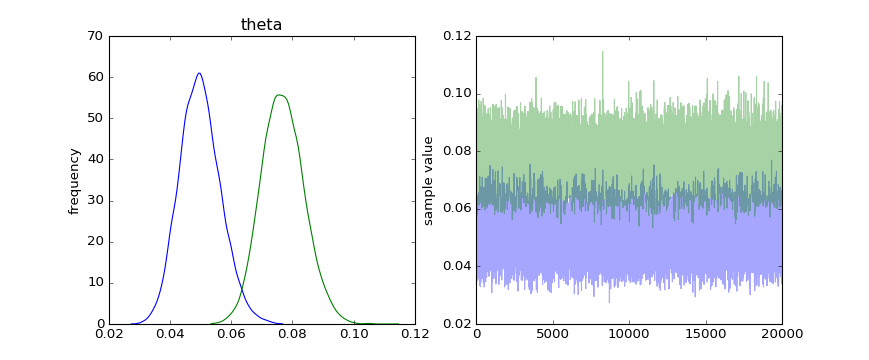

In [21]:
fit.plot();

In [22]:
trace = fit.extract();

In [25]:
theta = trace['theta']

In [33]:
print('P(A) > P(B):', (theta[:, 0] > theta[:, 1]).mean())

P(A) > P(B): 0.00225


In [34]:
print('P(A) < P(B):', (theta[:, 0] < theta[:, 1]).mean())

P(A) < P(B): 0.99775
